# 2d pattern matching

Wzorce dwuwymiarowe:
1. Zaimplementuj algorytm wyszukiwania wzorca 2-wymiarowego
2. Znajdź w załączonym pliku "haystack.txt" wszyskie sytuacje, gdy taka sama litera występuje na tej samej pozycji w dwóch kolejnych linijkach. Zwróć uwagę, na nierówną długość linii w pliku.
3. Znajdź wszystkie wystąpienia "th" oraz "t h" w dwóch kolejnych liniach na tej samej pozycji.
4. Wybierz przynajmniej 3 litery (małe). Znajdź wszystkie wystąpienia tej litery w załączonym pliku "haystack.png"
5. Znajdź wszystkie wystąpienia słowa "p a t t e r n" w haystack.png.
6. Porównaj czas budowania automatu i czas wyszukiwania dla różnych rozmiarów wzorca
7. Podziel plik na 2, 4 i 8 fragmentów (w poziomie) i porównaj czas przeszukiwania

Załączone wzorce to fragmenty książki "Jewels of Stringology".

## Zad 1. 
Zaimplementuj algorytm wyszukiwania wzorca 2-wymiarowego


#### Funkcja zwracająca różne kolumny wzorca

In [1]:
def get_cols(pattern):
    cols = []
    idxs = []
    
    letters = set()
    
    for j in range(len(pattern[0])):
        col = []
        for i in range(len(pattern)):
            col += [pattern[i][j]]
            letters.add(pattern[i][j])
            
        if col in cols:
            idx = cols.index(col)
            idxs.append(idx)
        else:
            cols.append(col)
            idxs.append(len(cols) - 1)
            
    return cols, idxs, letters

In [2]:
pattern = [['a','a'], 
           ['b','a']]

In [3]:
get_cols(pattern)

([['a', 'b'], ['a', 'a']], [0, 1], {'a', 'b'})

#### Funkcja tworząca automat (pionowo)

In [4]:
def vertical_automaton(cols, letters):
    tt = [{}]
    words = [[]]
    states = [0] * len(cols)
    
    for j in range(len(cols[0])):
        for i in range(len(cols)):
            if cols[i][j] in tt[states[i]]:
                states[i] = tt[states[i]][cols[i][j]]
            else:
                tt[states[i]][cols[i][j]] = len(tt)
                words.append(words[states[i]] + [cols[i][j]])
                states[i] = len(tt)
                tt.append({})
                
                
    for i in range(len(tt)):
        for letter in letters:
            if letter not in tt[i]:
                suffix = (words[i] + [letter])[1:]

                state = 0
                for s in suffix:
                    if s in tt[state]:
                        state = tt[state][s]
                    else:
                        state = 0
                        
                tt[i][letter] = state
                               
    return tt, states

In [5]:
cols,idx,letters = get_cols(pattern)

In [6]:
letters

{'a', 'b'}

In [7]:
vertical_automaton(cols, letters)

([{'a': 1, 'b': 0}, {'b': 2, 'a': 3}, {'b': 0, 'a': 1}, {'b': 2, 'a': 3}],
 [2, 3])

#### Funkcja tworząca automat (poziomo)

In [8]:
def horizontal_automaton(pattern, letters):
    result = []
    
    for state in range(len(pattern) + 1):
        result.append({})
        for a in letters:
            next_state = min(len(pattern), state + 1)
            
            while True:
                if pattern[:next_state] == (pattern[:state] + [a])[state - next_state + 1 : state + 1]:
                    break
                next_state -= 1 

            result[state][a] = next_state
            
    return result

In [9]:
horizontal_automaton(pattern, letters)

[{'b': 0, 'a': 0}, {'b': 0, 'a': 0}, {'b': 0, 'a': 0}]

#### Główna funkcja budująca automaty (poziomo + pionowo)

In [10]:
def get_automatons(pattern):
    cols, idxs, letters = get_cols(pattern)
    
    vertical_tt, vertical_states = vertical_automaton(cols, letters)
    
    pattern = [vertical_states[idxs[i]] for i in range(len(idxs))]
    
    horizontal_tt = horizontal_automaton(pattern, vertical_states)
    horizontal_state = len(horizontal_tt) - 1
    
    return (vertical_tt, horizontal_tt, horizontal_state)

In [11]:
get_automatons(pattern)

([{'a': 1, 'b': 0}, {'b': 2, 'a': 3}, {'b': 0, 'a': 1}, {'b': 2, 'a': 3}],
 [{2: 1, 3: 0}, {2: 1, 3: 2}, {2: 1, 3: 0}],
 2)

### Funkcja szukająca wzorca 2d

In [12]:
def pattern_matching_2d(text, pattern, automatons=None):
    
    vertical_tt, horizontal_tt, horizontal_accepting_state = get_automatons(pattern) if automatons is None else automatons

    result = []
    vertical_states = []
    
    for i, line in enumerate(text):
        
        if len(line) < len(vertical_states):
            vertical_states = vertical_states[:len(line)]
            
        elif len(vertical_states) < len(line):
            vertical_states = vertical_states + [0]*(len(line) - len(vertical_states))
            
            
        horizontal_state = 0
        for j, letter in enumerate(line):
            if letter in vertical_tt[vertical_states[j]]:
                vertical_states[j] = vertical_tt[vertical_states[j]][letter]
                
            else:
                vertical_states[j] = 0
                
            if vertical_states[j] in horizontal_tt[horizontal_state]:
                horizontal_state = horizontal_tt[horizontal_state][vertical_states[j]]
                
                if horizontal_state == horizontal_accepting_state:
                    result.append((i - len(pattern) + 1, j - len(pattern[0]) + 1))
                    
            else:
                horizontal_state = 0

    return result

### Podstawowy test

In [13]:
pattern2 = ['a','b']

In [14]:
text = [['x','a','a','a','a'], 
        ['d','b','a','c','b']]

In [15]:
result = pattern_matching_2d(text, pattern)

In [16]:
result

[(0, 1)]

In [17]:
result2 = pattern_matching_2d(text, pattern2)

In [18]:
result2

[(0, 1), (0, 4)]

## Zad 2. 
Znajdź w załączonym pliku "haystack.txt" wszyskie sytuacje, gdy taka sama litera występuje na tej samej pozycji w dwóch kolejnych linijkach. Zwróć uwagę, na nierówną długość linii w pliku.

In [19]:
with open('haystack.txt') as file:
    text = file.readlines()

In [20]:
for i in range(ord('a'), ord('z')+1):
    pattern = [chr(i),chr(i)]
    res = pattern_matching_2d(text, pattern)
    print("---------------------------------------------------------------------------------------------")
    print("PATTERN:\n", pattern)
    print("\nFOUND ON IDXs:\n", res if len(res) > 0 else "[no pattern found]", "\n")

---------------------------------------------------------------------------------------------
PATTERN:
 ['a', 'a']

FOUND ON IDXs:
 [(0, 82), (3, 30), (5, 60), (6, 63), (20, 6), (28, 69), (31, 50), (31, 73), (33, 66), (37, 4), (52, 12), (53, 12), (53, 48), (56, 11), (57, 36), (58, 36), (59, 24), (64, 2), (64, 14), (64, 22), (65, 35), (69, 35), (76, 21), (76, 74), (77, 42), (77, 61), (78, 59), (79, 37)] 

---------------------------------------------------------------------------------------------
PATTERN:
 ['b', 'b']

FOUND ON IDXs:
 [no pattern found] 

---------------------------------------------------------------------------------------------
PATTERN:
 ['c', 'c']

FOUND ON IDXs:
 [(3, 54), (10, 45), (13, 10), (41, 0), (68, 0), (82, 41)] 

---------------------------------------------------------------------------------------------
PATTERN:
 ['d', 'd']

FOUND ON IDXs:
 [(37, 19)] 

---------------------------------------------------------------------------------------------
PATTERN:

## Zad 3.
Znajdź wszystkie wystąpienia "th" oraz "t h" w dwóch kolejnych liniach na tej samej pozycji.

In [21]:
pattern = ["th",
           "th"]
res = pattern_matching_2d(text, pattern)
res

[]

In [22]:
pattern = ["t h",
           "t h"]
res = pattern_matching_2d(text, pattern)
res

[(37, 0)]

Możemy sprawdzić, czy w znalezionym miejscu faktycznie znajduje się podany wzorzec.

In [23]:
for i in range(35,41):
    for j in range(0,8):
        print(text[i][j], end = "")
    print()

represen
To the c
t h a t 
t h a n 
problem 
A simple


Zgadza się.

## Zad 4. 
Wybierz przynajmniej 3 litery (małe). Znajdź wszystkie wystąpienia tej litery w załączonym pliku "haystack.png"

Potrzebujemy funkcji, która skonwertuje odpowiedni obraz tak, by można było go potraktować jako zwykły pattern w powyższych funkcjach.

In [24]:
from PIL import Image

In [25]:
def convert(filename):
    image = Image.open(filename)
    pixels = list(image.getdata())
    width, height = image.size
    text = []
    i = width
    for pixel in pixels:
        if i == width:
            i = 0
            text.append([])
        text[-1].append(pixel[0])
        i += 1
    return text

In [26]:
text = convert('haystack.png')

a = convert("a.png")
b = convert("b.png")
c = convert("c.png")

In [27]:
a

[[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
 [255, 253, 177, 74, 25, 8, 45, 149, 255, 255, 255],
 [255, 203, 0, 0, 0, 0, 0, 0, 129, 255, 255],
 [255, 206, 87, 193, 236, 241, 186, 35, 10, 242, 255],
 [255, 255, 255, 255, 255, 255, 255, 175, 0, 188, 255],
 [255, 255, 159, 60, 16, 1, 0, 0, 0, 162, 255],
 [255, 138, 0, 0, 0, 0, 0, 0, 0, 155, 255],
 [255, 38, 23, 189, 238, 252, 255, 177, 0, 155, 255],
 [255, 38, 27, 201, 249, 238, 178, 31, 0, 155, 255],
 [255, 120, 0, 0, 0, 0, 0, 89, 0, 155, 255],
 [255, 249, 123, 31, 7, 41, 152, 199, 0, 155, 255],
 [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255]]

## $a$

In [28]:
res_a = pattern_matching_2d(text, a)

Liczba wystąpień $a$

In [29]:
len(res_a)

356

In [30]:
res_a[:10]

[(36, 206),
 (36, 262),
 (36, 322),
 (36, 486),
 (36, 622),
 (36, 750),
 (58, 302),
 (58, 332),
 (58, 390),
 (58, 641)]

## $b$

In [31]:
res_b = pattern_matching_2d(text, b)

Liczba wystąpień $b$

In [32]:
len(res_b)

44

In [33]:
res_b[:10]

[(76, 25),
 (142, 36),
 (142, 459),
 (142, 537),
 (142, 559),
 (208, 315),
 (252, 283),
 (274, 25),
 (318, 76),
 (318, 226)]

## $c$

In [34]:
res_c = pattern_matching_2d(text, c)

Liczba wystąpień $c$

In [35]:
len(res_c)

211

In [36]:
res_c[:10]

[(58, 369),
 (58, 419),
 (58, 588),
 (58, 689),
 (80, 327),
 (80, 377),
 (80, 427),
 (80, 505),
 (80, 669),
 (102, 45)]

## Zad 5.
Znajdź wszystkie wystąpienia słowa "p a t t e r n" w haystack.png.

In [37]:
pattern = convert('pattern.png')

In [38]:
pattern_matching_2d(text, pattern)

[(472, 181), (494, 425), (538, 239), (582, 139), (626, 245)]

## Zad 6. 
Porównaj czas budowania automatu i czas wyszukiwania dla różnych rozmiarów wzorca

In [39]:
from random import randint
from time import time
import matplotlib.pyplot as plt

In [40]:
with open('haystack.txt') as file:
    text = file.readlines()

#### Czas budowania automatu

In [41]:
def test_building_time(size):
    times = []

    for s in size:
        pattern = [[chr(randint(ord('a'), ord('z'))) for _ in range(s)] for _ in range(s)]
        start = time()
        get_automatons(pattern)
        end = time()
        times.append(end - start)
        
    return times

In [42]:
size = [i for i in range(10,200,20)]

In [43]:
times = test_building_time(size)

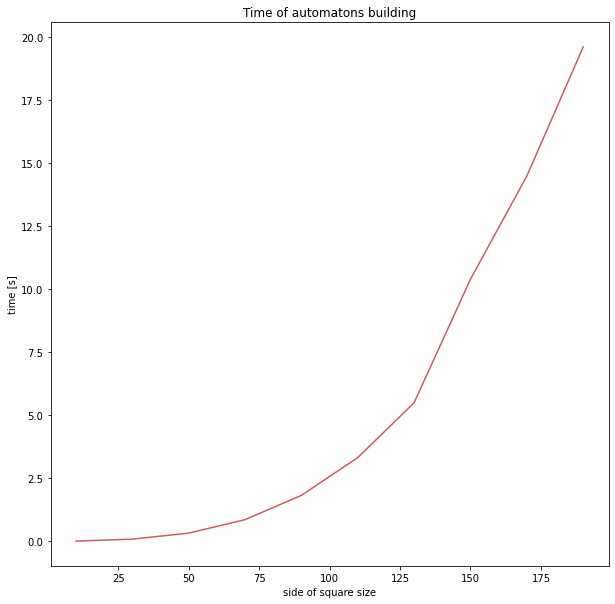

In [44]:
plt.figure(figsize=(10,10))
plt.plot(size,times, color="indianred")
plt.xlabel("side of square size")
plt.ylabel("time [s]")
plt.title("Time of automatons building")
plt.show()

#### Czas wyszukiwania
Rozważę różne rozmiary tekstu, a nie wzorca, ze względu na to, że czas budowania automatu dla większych wzorców jest bardzo długi w stosunku do czasu wyszukiwania.

In [45]:
def test_matching_time(text_size, pat_size):
    pattern = [line[:pat_size] for line in text[:pat_size]]
    aut = get_automatons(pattern)
    times = []

    for s in text_size:
        text1 = [line[:s] for line in text[:s]]
        start = time()
        pattern_matching_2d(text1, pattern, aut)        
        end = time()
        times.append(end - start)
        
    return times

In [46]:
text_size = [i for i in range(200,2000,200)]
pat_size = 25

In [47]:
text = convert('haystack.png')

In [48]:
times = test_matching_time(text_size, pat_size)

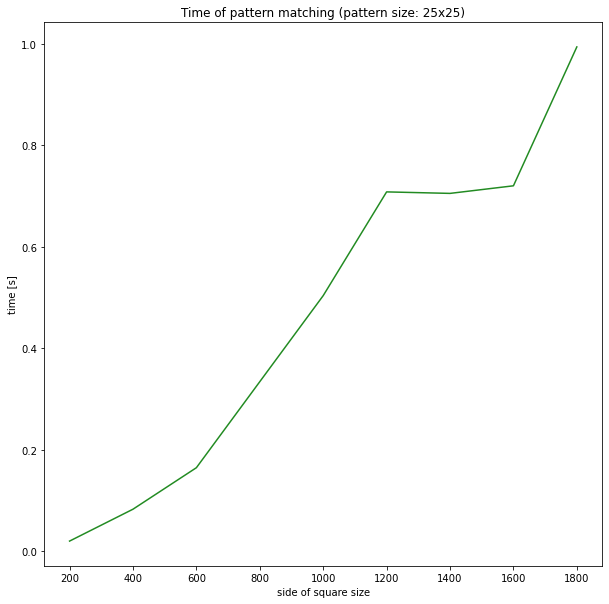

In [49]:
plt.figure(figsize=(10,10))
plt.plot(text_size,times,color="forestgreen")
plt.xlabel("side of square size")
plt.ylabel("time [s]")
plt.title("Time of pattern matching (pattern size: 25x25)")
plt.show()

In [50]:
pat_size = 100

In [51]:
times = test_matching_time(text_size, pat_size)

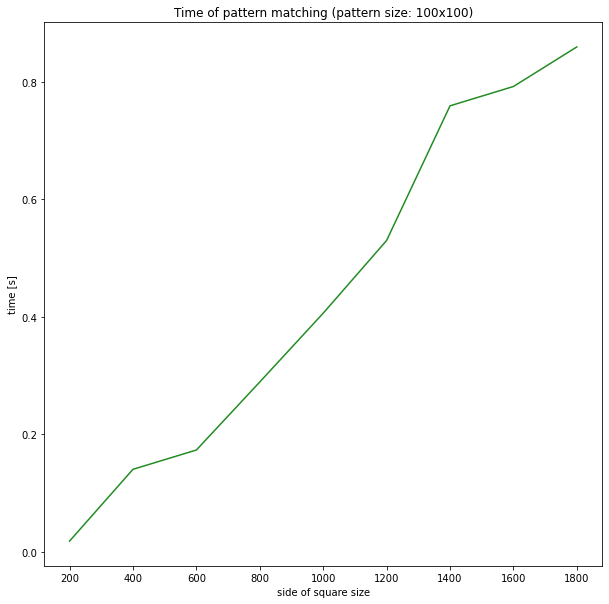

In [52]:
plt.figure(figsize=(10,10))
plt.plot(text_size,times,color="forestgreen")
plt.xlabel("side of square size")
plt.ylabel("time [s]")
plt.title("Time of pattern matching (pattern size: 100x100)")
plt.show()

Zarówno dla wzorca $25x25$, jak i $100x100$ czasy wyszukiwania różnią się nieznacznie. Mając zbudowany automat, algorytm przegląda każdy znak tekstu tylko raz.

## Zad 7. 
Podziel plik na 2, 4 i 8 fragmentów (w poziomie) i porównaj czas przeszukiwania

In [53]:
def test_divided(pat_size, parts):
    pattern = [line[:pat_size] for line in text[:pat_size]]
    
    times = []
    
    for part in parts:
        length = len(text) // part
        intervals = [text[i * length:(i + 1) * length] for i in range(part)]
        start = time()
        for current_text in intervals:
            pattern_matching_2d(current_text, pattern)
        end = time()
        times.append(end - start)
        
    return times

In [54]:
parts = [2,4,8]

In [55]:
times = test_divided(25, parts)

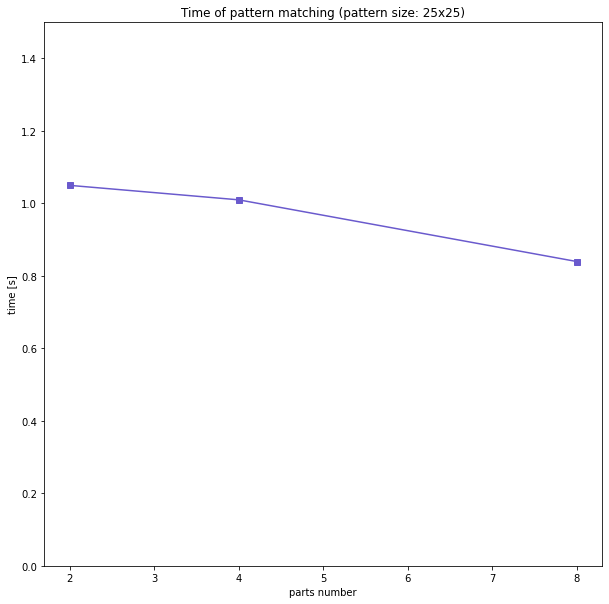

In [56]:
plt.figure(figsize=(10,10))
plt.plot(parts,times,marker='s',color="slateblue")
plt.xlabel("parts number")
plt.ylabel("time [s]")
plt.title("Time of pattern matching (pattern size: 25x25)")
plt.ylim(0,1.5)
plt.show()

Po podziale czas różni się bardzo nieznacznie. Algorytm działa liniowo.